In [9]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
import numpy as np
from astropy.io import fits
import warnings
from scipy import optimize
# import muse_tools as mt
import matplotlib.pyplot as plt
from astropy.stats import gaussian_sigma_to_fwhm
from telassar import PVSlice
import astropy.units as u



def gauss2D(amp, x0, y0, xsig, ysig):
    return lambda x, y: amp * np.exp(-(((x0 - x)/xsig)**2 +
                                       ((y0 - y)/ysig)**2)/2)

def moments(data):
    total = np.abs(data).sum()
    Y, X = np.indices(data.shape)
    y = np.argmax((X * np.abs(data)).sum(axis = 1) / total)
    x = np.argmax((Y * np.abs(data)).sum(axis = 0) /total)
    col = data[int(y), :]
    row = data[:, int(x)]
    xwidth = np.sqrt(np.abs((np.arange(col.size) - y)*col).sum() / 
                     np.abs(col).sum())
    ywidth = np.sqrt(np.abs((np.arange(row.size) - x)*row).sum() /
                     np.abs(row).sum())
    height = data.max()
    mom = np.array([ywidth, xwidth])
    return height, y, x, ywidth, xwidth

def fitgauss(data):
    params = (moments(data))
    errorfunction = lambda p: np.ravel(gauss2D(*p)(*np.indices(data.shape)) - data)
    p, success = optimize.leastsq(errorfunction, x0 = params)
    return p

In [168]:
f = fits.open('SII_rotated_new.fits')[0]
              #'../multigauss/SII_rotated.fits')[0]
               # 'muse_sii.fits')[0]
data = f.data
hdr = f.header


"hdr['CRVAL1'] = 269.0892271451439\nhdr['CRVAL2'] = -21.9559050000995\nhdr['CRPIX1'] = 23.998690626795305\nhdr['CRPIX2'] = 199.21297867935297\n\n# we messed this up somehow so fix it in the fits file\nnfile = fits.PrimaryHDU(data=data, header=hdr)\nnfile.writeto('SII_rotated_new.fits')\n"

In [169]:
muse_pv = np.sum(data[:, :, 16:29], axis = 2).T
#xshoo_pv = fits.open('data/HD163296_SIIF_6730.fits')[0]
#xsh_data = xshoo_pv.data
#xsh_hdr = xshoo_pv.header
muse_pv

array([[   0.        ,    0.        ,    0.        , ...,    0.        ,
           0.        ,    0.        ],
       [   0.        ,    0.        ,    0.        , ...,    0.        ,
           0.        ,    0.        ],
       [   0.        ,    0.        ,    0.        , ...,    0.        ,
           0.        ,    0.        ],
       ...,
       [ -13.22597724,   51.08261202, -102.23662614, ...,  -87.98288311,
         -47.78480202,   74.16908353],
       [ -36.83134163,   65.3907737 ,  -34.55826198, ...,   26.33621071,
         -42.15668079,  109.51412651],
       [ -10.56766405,   13.68468027,   48.95364902, ...,  -42.86477639,
          18.78263549,  205.79876794]])

<IPython.core.display.Javascript object>


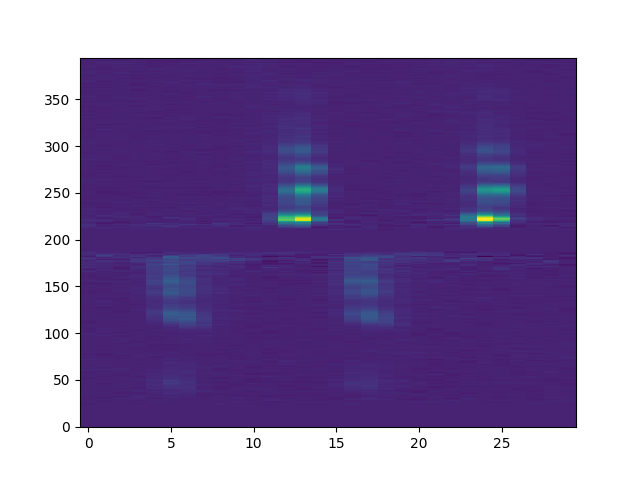

(30, 395, 43)

In [170]:
%matplotlib notebook
import matplotlib.pyplot as plt 
#plt.imshow(data[25, :, :], origin = 'lower', aspect = 'equal')
plt.imshow(muse_pv, origin = 'lower', aspect = 'auto')
data.shape

In [171]:
muse_sii = PVSlice(data = muse_pv, header=hdr)
                   # 'muse_sii.fits')
#xshoo_sii = PVSlice('data/HD163296_SIIF_6730.fits')
hdr

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -64 / array data type                                
NAXIS   =                    3 / number of array dimensions                     
NAXIS1  =                   43                                                  
NAXIS2  =                  395                                                  
NAXIS3  =                   30                                                  
WCSAXES =                    3 / Number of coordinate axes                      
CRPIX1  =    23.99869062679531 / Pixel coordinate of reference point            
CRPIX2  =     199.212978679353 / Pixel coordinate of reference point            
CUNIT1  = 'deg'                / Units of coordinate increment and value        
CUNIT2  = 'deg'                / Units of coordinate increment and value        
CTYPE1  = 'RA---TAN'           / Right ascension, gnomonic projection           
CTYPE2  = 'DEC--TAN'        

In [175]:
muse_sii.world.offset2pix(0)

198.212978679353

<IPython.core.display.Javascript object>


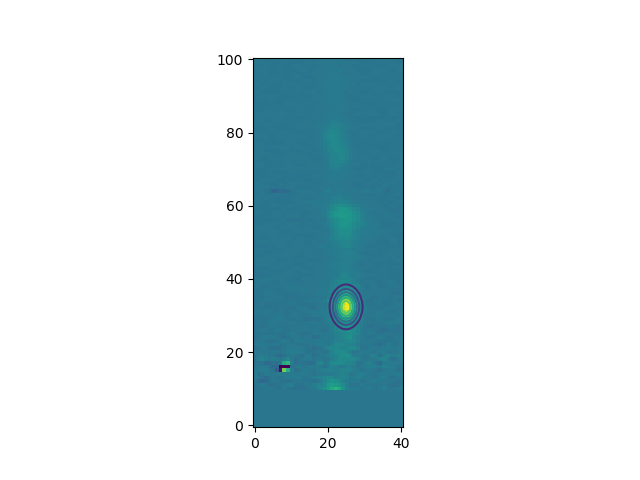

[3.52816464e-16 3.23795895e+01 2.49408304e+01 3.08250830e+00
 2.23585760e+00]


In [79]:
%matplotlib notebook

plt.imshow(data[140:241, 60:101], origin = 'lower')
plt.contour(fit(Y, X))
print(p)

In [119]:
xshoo2 = xshoo_sii.spectral_window(vmin = -400, vmax = 390, unit = u.Unit('km/s'))
#test = pv.spectral_window(vmin = 200, vmax = 300, unit = u.Unit('km/s'))

#pv2 = pv2.data * 1e16
#new_pv += np.abs(new_pv.min())
#new_pv.max()
xshoo2.world


WCS Keywords

Number of WCS axes: 2
CTYPE : 'OFFSET'  'VELO'  
CRVAL : -25.3  -395.354586567  
CRPIX : 1.0  1.0  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : 0.2  6.68566370727  
NAXIS : 330  119

In [41]:
lines = {
        'OI6300':   [6300.304, 'Angstrom', r'$[\mathrm{OI}]\lambda 6300\AA$'],
        'OI6363':   [6363.777, 'Angstrom', r'$[\mathrm{OI}]\lambda 6363\AA$'],
        'NII6548':  [6548.04, 'Angstrom', r'$[\mathrm{NII}]\lambda 6548\AA$'],
        'NII6583':  [6583.46,  'Angstrom', r'$[\mathrm{NII}]\lambda 6583\AA$'],
        'HAlpha':   [6562.8,  'Angstrom', r'$\mathrm{H}\alpha$'],
        'HBeta':    [4861.325,  'Angstrom', r'$\mathrm{H}\beta$'],
        'SII6716':  [6716.44,  'Angstrom', r'$[\mathrm{SII}]\lambda 6716\AA$'],
        'SII6731':  [6730.81,  'Angstrom', r'$[\mathrm{SII}]\lambda 6730\AA$'],
        'CaII7291': [7291.47, 'Angstrom', r'$[\mathrm{CaII}]\lambda 7291\AA$'],
        'CaII7324': [7323.89, 'Angstrom', r'$[\mathrm{CaII}]\lambda 7324\AA$']
}



-39.6425957358706
(372, 30)


<IPython.core.display.Javascript object>


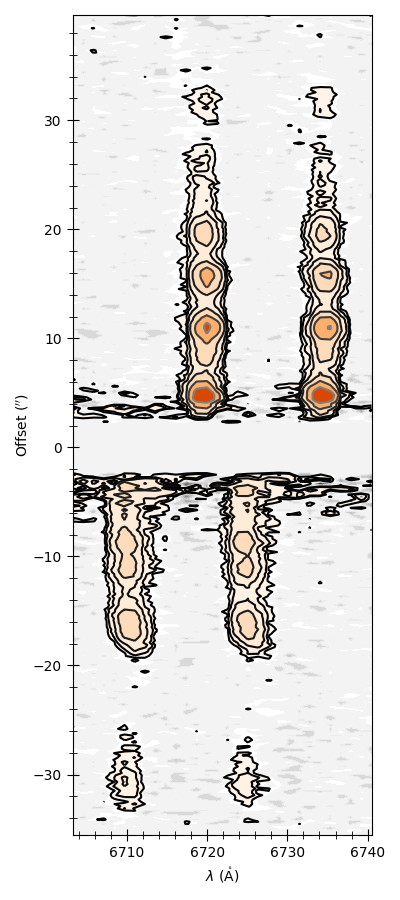

71.24848727746402


In [178]:
%matplotlib notebook
#mx = muse_sii.world.get_spatial_end()
print(muse_sii.world.get_spatial_start())
#print(mx)
#muse_sii2 = muse_sii.spatial_window(amin = -35., amax = mx, unit = u.Unit('arcsec'))
#muse_sii2.world
muse_sii2.plot_contours()


#ax = plt.gca()
#ax.set_aspect('auto')
#plt.axvline(x= 6730.81)
#plt.axvline(x = 6716.44)
#muse_sii.shape

In [27]:
%matplotlib notebook

sigma = 61.15070054856758

1.25 * sigma / muse_sii2.max()

0.010609895233061944

In [92]:
%timeit exponent(l2, sigma)
%timeit exp(l2, sigma)

3.7 µs ± 57.8 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
3.56 µs ± 19 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


(330, 118)


<IPython.core.display.Javascript object>


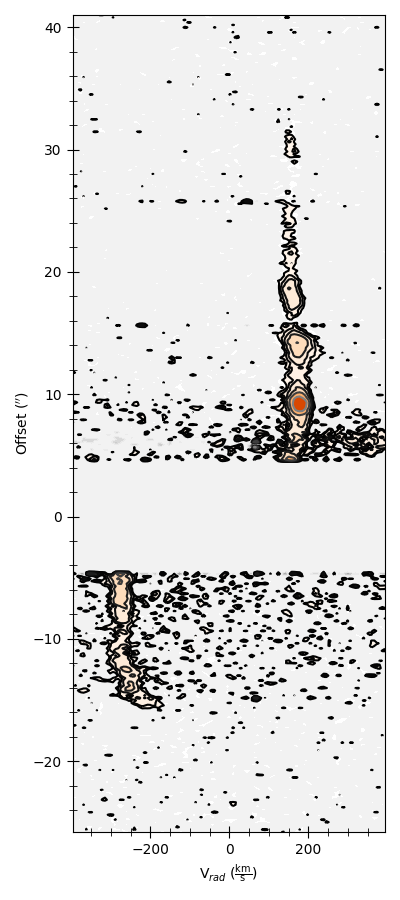

3.7151116607220626e-18


In [120]:
%matplotlib notebook
xshoo_sii = xshoo_sii.spectral_window(vmin = -400, vmax=390, unit = u.Unit('km/s'))
xshoo2.plot_contours()


In [284]:
print((np.linspace(60.8*(2), 1.1 * muse_sii.max(), 7)))
print(lvls[0])

[ 121.6        1422.14771474 2722.69542948 4023.24314422 5323.79085896
 6624.3385737  7924.88628844]
[ 121.69295919  243.38591838  486.77183675  973.54367351 1947.08734702
 3894.17469403 7788.34938807]


In [308]:
testlvls

array([0.01697583, 0.03395166, 0.06790333, 0.13580666, 0.27161332,
       0.54322664, 1.08645327])